## Simple CNN for Edgelovers


In this notebook you train a very simple CNN with only 1 kernel to discriminate images containing vertical (y=0) from those containing horizontal stripes (y=1). You can use keras for the solution.

![](./assets/kernel.png)

### a)  Generation of the data
Write a function which creates an artficially dataset of greyscale images (50x50 pixel) with 10 vertical or horizontal bars (10 pixel long). Use this function to create a training and validation dataset of 1000 examples each.


#### Image Generator

In [80]:
import random
import numpy as np
import pandas as pd

def generate(n_images = 1, width = 50, height = 50, n_lines = 10, line_length = 10):
    images = []
    directions = []
    for i_idx in range(0,n_images):

        # Generate pixels with random background color
        # bg_color = round(random.uniform(0,1), 2)
        bg_color = 0

        # Pixels with shape (columns, rows)
        pixels = np.full((width,height), bg_color)

        # Generate lines with random direction
        lines = []

        # Contrast of 50% between line and background 
        # line_color = abs(bg_color - 0.5) 
        line_color = 1

        # Random direction
        line_direction = random.choice([(0,1), (1,0)])

        for l_idx in range(0,n_lines):

            # Random starting point
            px_start = [random.randint(0, width - 1 - line_length), random.randint(0, height - 1 - line_length)]

            # xy for every pixel of the line
            line_pixels = [px_start]

            for px_idx in range(1,line_length):
                xy = []
                if line_direction == (0,1):
                    xy = [px_start[0]+px_idx,px_start[1]]
                if line_direction == (1,0):
                    xy = [px_start[0],px_start[1]+px_idx]
                line_pixels.append(xy)
            lines.append(line_pixels)
        
        # Color the lines on the image
        for line in lines:
            for xy in line:
                x = xy[0]
                y = xy[1]
                pixels[x][y] = line_color

        # Flatten from shape (50,50) to (2500)
        # pixels = np.array(pixels).reshape((width*height))
        pixels = np.array(pixels).reshape((width,height,1))

        # Output images and their line directions
        images.append(pixels)
        directions.append(line_direction)

    return np.array(images), np.array(directions)

#### Generate data

In [81]:
X_train, y_train = generate(1000, 50, 50, 10, 10)
X_val, y_val = generate(1000, 50, 50, 10, 10)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

X_train (1000, 50, 50, 1)
y_train (1000, 2)



### b) Build the simplest possible CNN
Make a CNN with one convolution (5x5, haveing two outputs (one for horizontal, one for vertical). Train the CNN on the data from a). You should have no more than 30 trainable parameters in the network. 
* Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.You should get an accuracy of approximatly 1.

Hint: Use the max-pooling operation in a clever way.



In [82]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

model = keras.Sequential()

# Layers
model.add(Convolution2D(1, kernel_size=5, activation="relu", input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=(46,46)))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))

# Model
model.compile(optimizer=SGD(), loss="categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 46, 46, 1)         26        
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 1, 1)          0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 1)                 0         
                                                                 
 dense_21 (Dense)            (None, 2)                 4         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
32/32 [==============================] - 1s 19ms/step - loss: 0.6323 - accuracy: 0.5040 - val_loss: 0.5665 - val_accuracy: 0.4950
Epoch 2/10
32/32 [==============================] - 0s 15ms/step - loss: 0.5169 - accuracy: 0.6540 - val_loss: 0.4815 - val_accuracy: 0.9800
Epoch 3/10
32/32 [==============================] - 0s 15ms/step - loss: 0.4499 - accuracy: 0.9910 - val_loss: 0.4283 - val_accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 0s 15ms/step - loss: 0.4047 - accuracy: 1.0000 - val_loss: 0.3880 - val_accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 0s 15ms/step - loss: 0.3682 - accuracy: 1.0000 - val_loss: 0.3548 - val_accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 0s 15ms/step - loss: 0.3372 - accuracy: 1.0000 - val_loss: 0.3262 - val_accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 0s 15ms/step - loss: 0.3106 - accuracy: 1.0000 - val_loss: 0.3013 - val_accuracy: 1.0000
Epoch 8/10
32

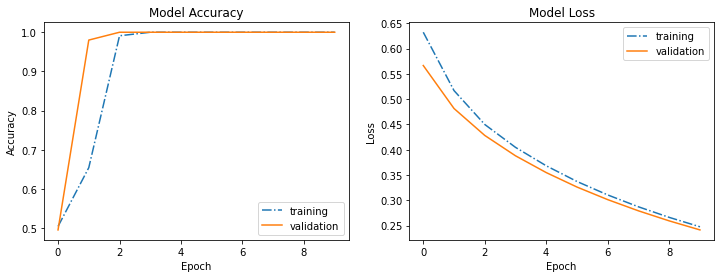

In [83]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Plot
plt.figure(figsize=(12,4))

plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='lower right')

plt.subplot(1,2,(2))
plt.plot(history.history['loss'], linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')



### c) Visualize the learned kernel
Visualize the learned kernel, you might want to use `model.get_weights()`. Does the learned kernel makes sense?

In [84]:
model.get_weights()

[array([[[[ 0.08943892]],
 
         [[ 0.00480139]],
 
         [[-0.10014962]],
 
         [[-0.29490072]],
 
         [[-0.16192253]]],
 
 
        [[[ 0.04175611]],
 
         [[-0.34723058]],
 
         [[ 0.40298516]],
 
         [[-0.04254961]],
 
         [[-0.25960398]]],
 
 
        [[[ 0.04537903]],
 
         [[-0.4132267 ]],
 
         [[ 0.46880978]],
 
         [[-0.38742805]],
 
         [[ 0.02077032]]],
 
 
        [[[-0.40526763]],
 
         [[-0.05532889]],
 
         [[ 0.5617097 ]],
 
         [[-0.21549992]],
 
         [[-0.24561265]]],
 
 
        [[[-0.29151535]],
 
         [[ 0.20606153]],
 
         [[ 0.18502533]],
 
         [[-0.06441996]],
 
         [[-0.23298745]]]], dtype=float32),
 array([-0.1972511], dtype=float32),
 array([[-1.471205 ,  0.6004434]], dtype=float32),
 array([ 0.38667178, -0.38667175], dtype=float32)]